<a href="https://colab.research.google.com/github/BachokunIAR/DL-tensorflow/blob/main/MLC_Natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
imdb = tf.keras.datasets.imdb
max_fefatures = 5000

(xtrain, ytrain),(xtest,ytest) = imdb.load_data(num_words=max_fefatures)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(25000,)

In [ ]:
xtrain[0:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [ ]:
ytrain[0:2]

array([1, 0])

In [ ]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


## EAch word is represented by and Integer

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

## Data preparation

In [ ]:
def matrix_seq(data, dim=max_fefatures):
  results = np.zeros((len(data),dim)) # create a matrix of zeros for writing
  for i , loc in enumerate(data):

    results[i,loc]=1.    # put a 1.0 when the word exist

  return results

In [ ]:
xtrain = matrix_seq(xtrain)
xtest = matrix_seq(xtest)


In [ ]:
ytrain = np.asarray(ytrain.astype('float32'))
ytest = np.asarray(ytest.astype('float32'))

In [ ]:
ytrain.shape

(25000,)

## Network Archityure

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape =(5000,)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.summary()
model.compile(optimizer ='sgd',loss = 'binary_crossentropy',
              metrics=['accuracy']
              )
#h = model.fit(xtrain, ytrain, epochs = 10, batch_size=256)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                80016     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 80305 (313.69 KB)
Trainable params: 80305 (313.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Measure the Performance of NN

In [ ]:
x_val = xtrain[:10000]
xtrain_1 = xtrain[10000:]

In [ ]:
y_val = ytrain[:10000]

ytrain_1 = ytrain[10000:]

In [ ]:
h = model.fit(xtrain_1,
              ytrain_1,
              epochs = 50,
              batch_size=512,
              validation_data= (x_val,y_val))

Epoch 1/50
30/30 [==============================] - 6s 38ms/step - loss: 0.6924 - accuracy: 0.5139 - val_loss: 0.6891 - val_accuracy: 0.5369
Epoch 2/50
30/30 [==============================] - 0s 13ms/step - loss: 0.6890 - accuracy: 0.5470 - val_loss: 0.6860 - val_accuracy: 0.5654
Epoch 3/50
30/30 [==============================] - 0s 14ms/step - loss: 0.6853 - accuracy: 0.5761 - val_loss: 0.6821 - val_accuracy: 0.5928
Epoch 4/50
30/30 [==============================] - 0s 15ms/step - loss: 0.6804 - accuracy: 0.6072 - val_loss: 0.6766 - val_accuracy: 0.6192
Epoch 5/50
30/30 [==============================] - 0s 15ms/step - loss: 0.6740 - accuracy: 0.6357 - val_loss: 0.6693 - val_accuracy: 0.6456
Epoch 6/50
30/30 [==============================] - 0s 14ms/step - loss: 0.6658 - accuracy: 0.6616 - val_loss: 0.6608 - val_accuracy: 0.6654
Epoch 7/50
30/30 [==============================] - 0s 15ms/step - loss: 0.6564 - accuracy: 0.6827 - val_loss: 0.6511 - val_accuracy: 0.6950
Epoch 8/50
30

In [ ]:
loss_values = h.history['loss']

val_loss_value  = h.history['val_loss']



epochs = range(1, len(h.history['accuracy'])+1)

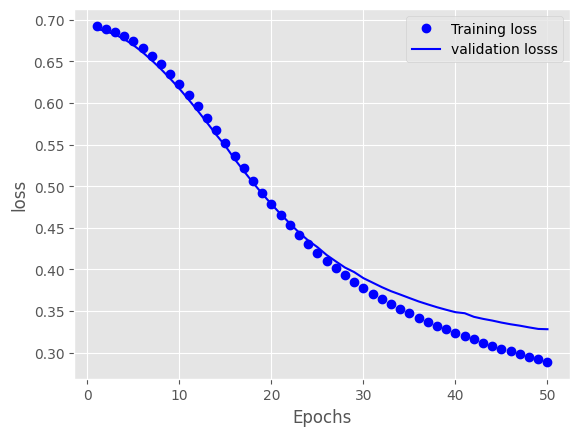

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(epochs, loss_values, 'bo',
          label = 'Training loss')

plt.plot(epochs, val_loss_value, 'b',
         label= 'validation losss')

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend();


In [ ]:
acc_values = h.history['accuracy']

val_acc_value  = h.history['val_accuracy']



epochs = range(1, len(h.history['accuracy'])+1)

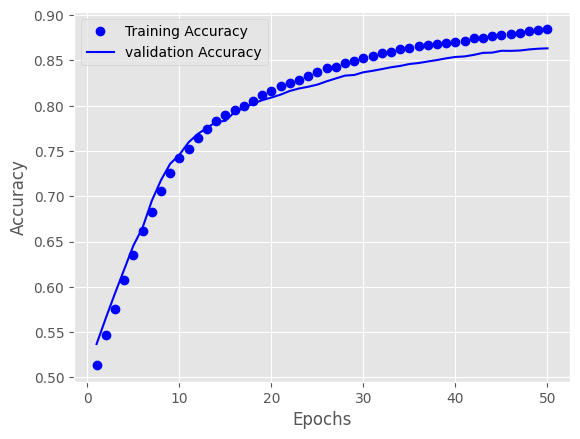

In [ ]:
plt.style.use('ggplot')
plt.plot(epochs, acc_values, 'bo',
          label = 'Training Accuracy')

plt.plot(epochs, val_acc_value, 'b',
         label= 'validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();